In [1]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from PIL import Image
import scipy.stats as stats
import math
import pylab 
import scipy

In [2]:
lunar = pd.read_table('lunar_finale.csv', na_values='NA', delimiter=',')
lunar.head(5)

,Unnamed: 0,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Quincena Solar Eclipse,Gamma,Penumbral Magnitude,Umbral Magnitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m),Latitude3,Longitude3,Time JD
0,0,46437,-49456,17,0,9,-1.0981,0.8791,-0.1922,268.8,0.0,0.0,-24,-22,991100.092685
1,1,46427,-49451,-16,0,0,-1.1155,0.8143,-0.1921,233.4,0.0,0.0,15,-98,991248.349873
2,2,46416,-49445,-11,4,3,0.8988,1.2105,0.2069,281.7,102.7,0.0,-13,89,991424.741389
3,3,46404,-49439,-6,4,0,-0.4644,2.0382,0.9740,343.4,200.8,0.0,12,113,991602.719421
4,4,46392,-49433,-1,6,7,0.1003,2.6513,1.6963,322.8,213.5,98.2,-11,-92,991779.289595


In [3]:
predictors=lunar[['Gamma', 'Quincena Solar Eclipse', 'Eclipse Type', 'Total Eclipse Duration (m)', 'Partial Eclipse Duration (m)', 'Lunation Number']]
y=lunar[['Saros Number', 'Umbral Magnitude', 'Penumbral Magnitude', 'Penumbral Eclipse Duration (m)']]

In [ ]:
predictors.columns = ["V"+str(i) for i in range(1, len(predictors.columns)+1)]
data=predictors
data[['V7','V8','V9','V10']]=y
data.head()

In [5]:
distributions = [stats.gennorm, stats.gennorm, stats.mielke, stats.loggamma]

In [19]:
def get_bin_count(feature):
    n = feature.shape[0]
    return np.round(5 * np.log(n)).astype('int')

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


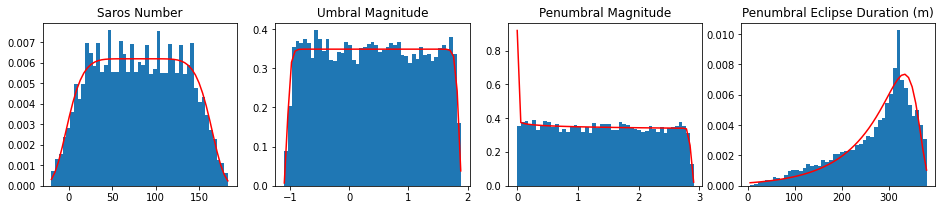

In [23]:
figure, axes = plt.subplots(1, 4, figsize=(4 * 4, 3))
x_sar = np.linspace(data.V7.min(), data.V7.max())
params_sar = stats.gennorm.fit(data.V7)
pdf_sar = stats.gennorm.pdf(x_sar, *params_sar)
axes[0].hist(data.V7, bins=get_bin_count(data.V7), density=True)
axes[0].plot(x_sar, pdf_sar, 'r')
axes[0].title.set_text('Saros Number')

x_umbra = np.linspace(data.V8.min(), data.V8.max())
params_umbra = stats.gennorm.fit(data.V8)
pdf_umbra = stats.gennorm.pdf(x_umbra, *params_umbra)
axes[1].hist(data.V8, bins=get_bin_count(data.V8), density=True)
axes[1].plot(x_umbra, pdf_umbra, 'r')
axes[1].title.set_text('Umbral Magnitude')

x_penmag = np.linspace(data.V9.min(), data.V9.max())
params_penmag = stats.mielke.fit(data.V9)
pdf_penmag = stats.mielke.pdf(x_penmag, *params_penmag)
axes[2].hist(data.V9, bins=get_bin_count(data.V9), density=True)
axes[2].plot(x_penmag, pdf_penmag, 'r')
axes[2].title.set_text('Penumbral Magnitude')

x_pendur = np.linspace(data.V10.min(), data.V10.max())
params_pendur = stats.loggamma.fit(data.V10)
pdf_pendur = stats.loggamma.pdf(x_pendur, *params_pendur)
axes[3].hist(data.V10, bins=get_bin_count(data.V10), density=True)
axes[3].plot(x_pendur, pdf_pendur, 'r')
axes[3].title.set_text('Penumbral Eclipse Duration (m)')

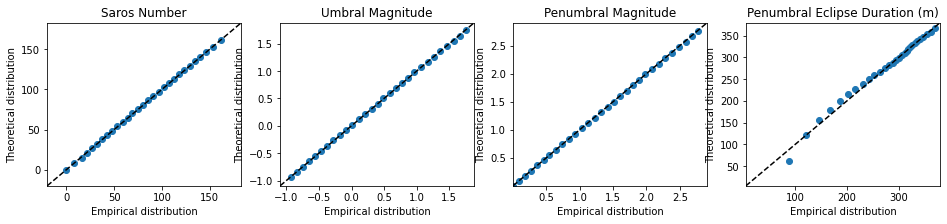

In [28]:
figure, axes = plt.subplots(1, 4, figsize=(4 * 4, 3))
x_sar = np.linspace(data.V7.min(), data.V7.max())
percs = np.linspace(0, 100, 31)
qn_sar = np.percentile(data.V7, percs)
qn_dist_sar = stats.gennorm.ppf(percs / 100.0, *params_sar)
axes[0].plot(qn_sar, qn_dist_sar, ls="", marker="o", markersize=6)
axes[0].plot(x_sar, x_sar, color="k", ls="--")
axes[0].set_xlim(data.V7.min(), data.V7.max())
axes[0].set_ylim(data.V7.min(), data.V7.max())
axes[0].set_xlabel('Empirical distribution')
axes[0].set_ylabel('Theoretical distribution')
axes[0].title.set_text('Saros Number')

x_umbra = np.linspace(data.V8.min(), data.V8.max())
percs = np.linspace(0, 100, 31)
qn_umbra = np.percentile(data.V8, percs)
qn_dist_umbra = stats.gennorm.ppf(percs / 100.0, *params_umbra)
axes[1].plot(qn_umbra, qn_dist_umbra, ls="", marker="o", markersize=6)
axes[1].plot(x_umbra, x_umbra, color="k", ls="--")
axes[1].set_xlim(data.V8.min(), data.V8.max())
axes[1].set_ylim(data.V8.min(), data.V8.max())
axes[1].set_xlabel('Empirical distribution')
axes[1].set_ylabel('Theoretical distribution')
axes[1].title.set_text('Umbral Magnitude')

x_penmag = np.linspace(data.V9.min(), data.V9.max())
percs = np.linspace(0, 100, 31)
qn_penmag = np.percentile(data.V9, percs)
qn_dist_penmag = stats.mielke.ppf(percs / 100.0, *params_penmag)
axes[2].plot(qn_penmag, qn_dist_penmag, ls="", marker="o", markersize=6)
axes[2].plot(x_penmag, x_penmag, color="k", ls="--")
axes[2].set_xlim(data.V9.min(), data.V9.max())
axes[2].set_ylim(data.V9.min(), data.V9.max())
axes[2].set_xlabel('Empirical distribution')
axes[2].set_ylabel('Theoretical distribution')
axes[2].title.set_text('Penumbral Magnitude')

x_pendur = np.linspace(data.V10.min(), data.V10.max())
percs = np.linspace(0, 100, 31)
qn_pendur = np.percentile(data.V10, percs)
qn_dist_pendur = stats.loggamma.ppf(percs / 100.0, *params_pendur)
axes[3].plot(qn_pendur, qn_dist_pendur, ls="", marker="o", markersize=6)
axes[3].plot(x_pendur, x_pendur, color="k", ls="--")
axes[3].set_xlim(data.V10.min(), data.V10.max())
axes[3].set_ylim(data.V10.min(), data.V10.max())
axes[3].set_xlabel('Empirical distribution')
axes[3].set_ylabel('Theoretical distribution')
axes[3].title.set_text('Penumbral Eclipse Duration (m)')

Семплирование методом обратной функции

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5095: RuntimeWarning: divide by zero encountered in power
  return k*x**(k-1.0) / (1.0+x**s)**(1.0+k*1.0/s)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4734: RuntimeWarning: invalid value encountered in subtract
  return np.exp(c*x-np.exp(x)-sc.gammaln(c))


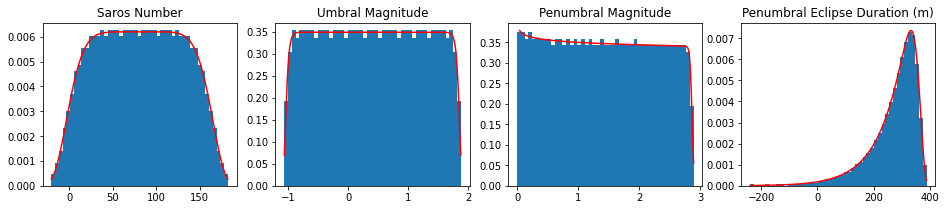

In [39]:
figure, axes = plt.subplots(1, 4, figsize=(4 * 4, 3))
percs = np.linspace(0, 100, 1000)
qn_dist_sar = stats.gennorm.ppf(percs / 100.0, *params_sar)
pdf_sample_sar = scipy.stats.gennorm.pdf(qn_dist_sar, *params_sar)
axes[0].plot(qn_dist_sar,pdf_sample_sar , 'r')
x_hist_sar=qn_dist_sar[1:qn_dist_sar.size-1]
axes[0].hist(x_hist_sar, bins=get_bin_count(data.V7), density=True)
axes[0].title.set_text('Saros Number')

qn_dist_umbra = stats.gennorm.ppf(percs / 100.0, *params_umbra)
pdf_sample_umbra = scipy.stats.gennorm.pdf(qn_dist_umbra, *params_umbra)
axes[1].plot(qn_dist_umbra,pdf_sample_umbra , 'r')
x_hist_umbra=qn_dist_umbra[1:qn_dist_umbra.size-1]
axes[1].hist(x_hist_umbra, bins=get_bin_count(data.V8), density=True)
axes[1].title.set_text('Umbral Magnitude')

qn_dist_penmag = stats.mielke.ppf(percs / 100.0, *params_penmag)
pdf_sample_penmag = scipy.stats.mielke.pdf(qn_dist_penmag, *params_penmag)
axes[2].plot(qn_dist_penmag,pdf_sample_penmag , 'r')
x_hist_penmag=qn_dist_penmag[1:qn_dist_penmag.size-1]
axes[2].hist(x_hist_penmag, bins=get_bin_count(data.V9), density=True)
axes[2].title.set_text('Penumbral Magnitude')

qn_dist_pendur = stats.loggamma.ppf(percs / 100.0, *params_pendur)
pdf_sample_pendur = scipy.stats.loggamma.pdf(qn_dist_pendur, *params_pendur)
axes[3].plot(qn_dist_pendur,pdf_sample_pendur , 'r')
x_hist_pendur=qn_dist_pendur[1:qn_dist_pendur.size-1]
axes[3].hist(x_hist_pendur, bins=get_bin_count(data.V10), density=True)
axes[3].title.set_text('Penumbral Eclipse Duration (m)')

Семплирование методом Accept-Reject

In [98]:
#normal PDF
def gauss(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

Text(0.5, 1.0, 'M=1.55')

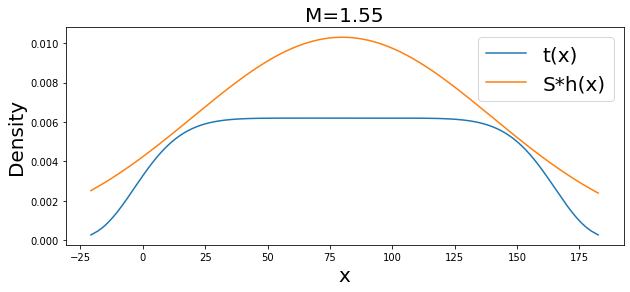

In [99]:
x_vals_sar = np.linspace(np.min(data.V7), np.min(data.V7),1000)
percs = np.linspace(0, 100, 1000)
qn_dist_sar = scipy.stats.gennorm.ppf(percs / 100.0, *params_sar)
f_vals_sar = scipy.stats.gennorm.pdf(qn_dist_sar, *params_sar)
g_vals_sar = gauss(qn_dist_sar, 80, 60)
M = 1.55

plt.figure(figsize=(10,4))
plt.plot(qn_dist_sar, f_vals_sar)
plt.plot(qn_dist_sar, M*g_vals_sar)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)
plt.title("M=%s"%M, fontsize=20)

(-25.0, 180.0)

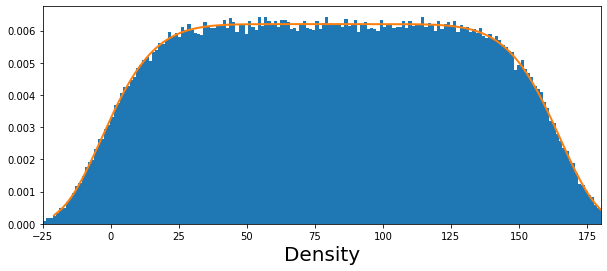

In [112]:
samples_sar = []

#number of instances
N = 1000000

for _ in range(N):
    candidate = np.random.normal(80, 60)
    prob_accept = scipy.stats.gennorm.pdf(candidate, *params_sar) / (M*gauss(candidate, 80, 60))
    #accept with the calculated probability
    if np.random.random() < prob_accept:
        samples_sar.append(candidate)

plt.figure(figsize=(10,4))
plt.hist(samples_sar, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(qn_dist_sar, [f for f in f_vals_sar], linewidth=2)
plt.xlim(-25,180)

In [103]:
#uniform PDF
def unif(x, a, b):
    return (x-x+1)/(b-a)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'M=1.42')

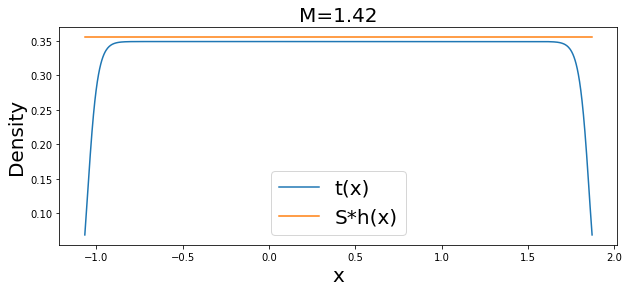

In [104]:
x_vals_umbra = np.linspace(np.min(data.V8), np.min(data.V8),1000)
percs = np.linspace(0, 100, 1000)
qn_dist_umbra = scipy.stats.gennorm.ppf(percs / 100.0, *params_umbra)
f_vals_umbra = scipy.stats.gennorm.pdf(qn_dist_umbra, *params_umbra)
g_vals_umbra = unif(qn_dist_umbra, -2, 2)
M = 1.42

plt.figure(figsize=(10,4))
plt.plot(qn_dist_umbra, f_vals_umbra)
plt.plot(qn_dist_umbra, M*g_vals_umbra)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)
plt.title("M=%s"%M, fontsize=20)

(-1.2, 2.0)

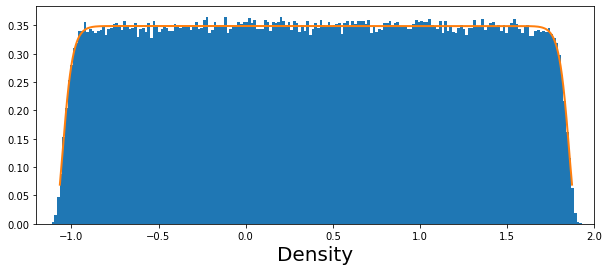

In [113]:
samples_umbra = []

#number of instances
N = 1000000

for _ in range(N):
    candidate = np.random.uniform(-2, 2)
    prob_accept = scipy.stats.gennorm.pdf(candidate, *params_umbra) / (M*unif(candidate, -2, 2))
    #accept with the calculated probability
    if np.random.random() < prob_accept:
        samples_umbra.append(candidate)

plt.figure(figsize=(10,4))
plt.hist(samples_umbra, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(qn_dist_umbra, [f for f in f_vals_umbra], linewidth=2)
plt.xlim(-1.2,2)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:5095: RuntimeWarning: divide by zero encountered in power
  return k*x**(k-1.0) / (1.0+x**s)**(1.0+k*1.0/s)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'M=1.15')

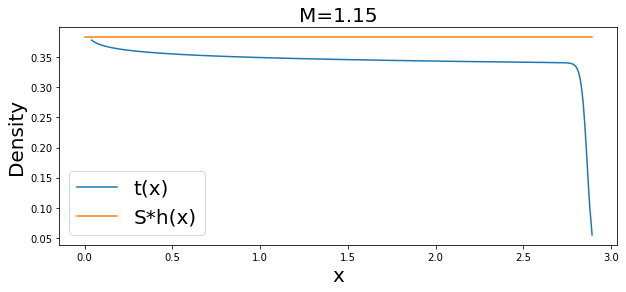

In [107]:
x_vals_penmag = np.linspace(np.min(data.V9), np.min(data.V9),1000)
percs = np.linspace(0, 100, 1000)
qn_dist_penmag = scipy.stats.mielke.ppf(percs / 100.0, *params_penmag)
f_vals_penmag = scipy.stats.mielke.pdf(qn_dist_penmag, *params_penmag)
g_vals_penmag = unif(qn_dist_penmag, 0, 3)
M = 1.15

plt.figure(figsize=(10,4))
plt.plot(qn_dist_penmag, f_vals_penmag)
plt.plot(qn_dist_penmag, M*g_vals_penmag)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)
plt.title("M=%s"%M, fontsize=20)

(0.0, 3.0)

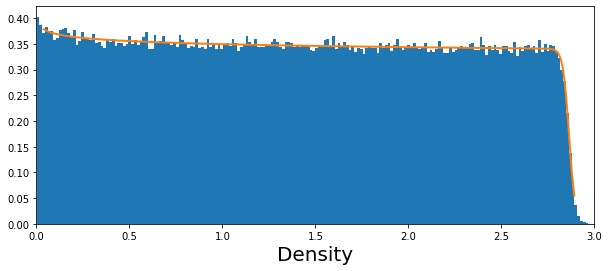

In [114]:
samples_penmag = []

#number of instances
N = 1000000

for _ in range(N):
    candidate = np.random.uniform(0, 3)
    prob_accept = scipy.stats.mielke.pdf(candidate, *params_penmag) / (M*unif(candidate, 0, 3))
    #accept with the calculated probability
    if np.random.random() < prob_accept:
        samples_penmag.append(candidate)

plt.figure(figsize=(10,4))
plt.hist(samples_penmag, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(qn_dist_penmag, [f for f in f_vals_penmag], linewidth=2)
plt.xlim(0,3)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4734: RuntimeWarning: invalid value encountered in subtract
  return np.exp(c*x-np.exp(x)-sc.gammaln(c))


Text(0.5, 1.0, 'M=3.2')

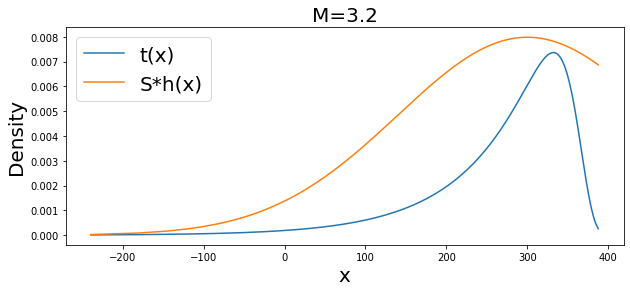

In [109]:
x_vals_pendur = np.linspace(np.min(data.V10), np.min(data.V10),1000)
percs = np.linspace(0, 100, 1000)
qn_dist_pendur = scipy.stats.loggamma.ppf(percs / 100.0, *params_pendur)
f_vals_pendur = scipy.stats.loggamma.pdf(qn_dist_pendur, *params_pendur)
g_vals_pendur = gauss(qn_dist_pendur, 300, 160)
M = 3.2

plt.figure(figsize=(10,4))
plt.plot(qn_dist_pendur, f_vals_pendur)
plt.plot(qn_dist_pendur, M*g_vals_pendur)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['t(x)', 'S*h(x)'], fontsize=20)
#plt.xlim(-250,-200)
#plt.ylim(0, 0.0001)
plt.title("M=%s"%M, fontsize=20)

(-200.0, 400.0)

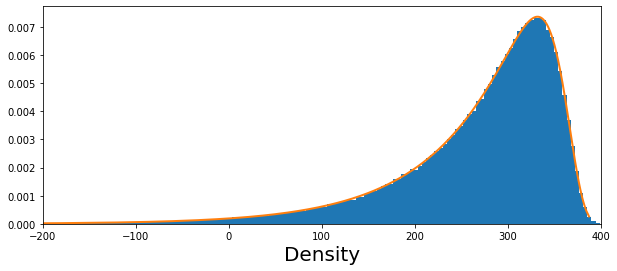

In [115]:
samples_pendur = []

#number of instances
N = 1000000

for _ in range(N):
    candidate = np.random.normal(300, 160)
    prob_accept = scipy.stats.loggamma.pdf(candidate, *params_pendur) / (M*gauss(candidate, 300, 160))
    #accept with the calculated probability
    if np.random.random() < prob_accept:
        samples_pendur.append(candidate)

plt.figure(figsize=(10,4))
plt.hist(samples_pendur, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(qn_dist_pendur, [f for f in f_vals_pendur], linewidth=2)
plt.xlim(0,400)

(0.0, 400.0)

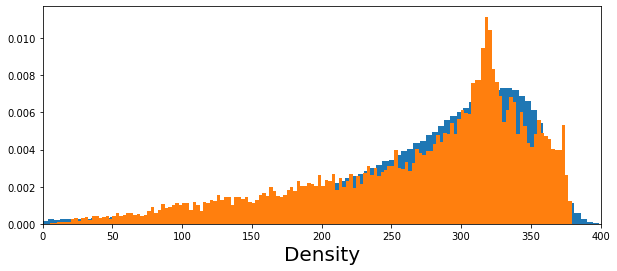

In [124]:
plt.figure(figsize=(10,4))
plt.hist(samples_pendur, bins=200, density=True)
plt.hist(data.V10, bins=150, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.xlim(0,400)